# I love LSD

## Create a structured pattern in noise

In [1]:
nb_syn, noise_density, simtime, t_true = 50, 1e-3, 1e3, .5e3
T = 100

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k=4):
    return A*norm(np.cos(k*np.pi*(np.linspace(0, 1, N_inputs)-theta)))

def linear(N_inputs, A, theta):
    return np.linspace(0, A, N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta=0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.randint(0, simtime, N_noise)

    # draw stimulus -> stim
    adress_pattern = np.arange(0, nb_syn)
    time_pattern = function(nb_syn, T, theta) + t_true #.astype(int)

    # make address event representation
    time = np.hstack((time_noise, time_pattern))
    addr = np.hstack((adress_noise, adress_pattern))
    sorted_times = np.argsort(time)
    aer = (addr[sorted_times], time[sorted_times])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

In [3]:
noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
noise

array([[750],
       [524],
       [848],
       [304],
       [985],
       [959],
       [632],
       [534],
       [ 93],
       [902],
       [556],
       [575],
       [795],
       [379],
       [629],
       [824],
       [696],
       [410],
       [952],
       [620],
       [380],
       [160],
       [902],
       [269],
       [501],
       [402],
       [912],
       [541],
       [589],
       [971],
       [294],
       [666],
       [962],
       [565],
       [216],
       [ 40],
       [202],
       [179],
       [188],
       [945],
       [437],
       [413],
       [867],
       [499],
       [ 23],
       [347],
       [281],
       [528],
       [196],
       [855]])

In [4]:
time_pattern = t_true + cospattern(nb_syn, T, theta=0)
t_true, time_pattern

(500.0,
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
        598.36306152, 600.        ]))

In [5]:
aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [6]:
aer_noise

(array([35,  4, 33, 46, 47,  2, 13, 34, 44, 35, 13, 49, 39, 14, 16, 36, 17,
        19, 35,  1,  7, 34, 33, 11, 15, 10, 49, 17,  1, 42, 33,  2,  3, 17,
        42, 15,  1, 18, 32, 45, 25, 41, 23, 14, 32,  5,  1,  2,  9,  0]),
 array([828, 195, 418, 620, 851, 449, 641, 971, 641, 549, 647, 367, 139,
        537, 215, 557, 910, 500, 924, 527, 511, 373,  75, 152, 975, 872,
         96, 423, 780, 432, 206, 278, 243, 419, 561, 482, 811, 834, 295,
        160, 937, 472, 854, 350, 718, 707,  95, 379, 972, 741]))

In [7]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
      

In [8]:
aer_pattern[1].min()

500.0

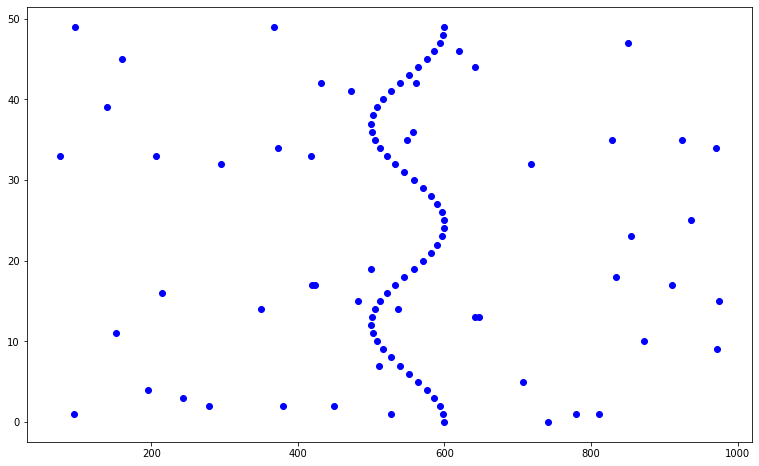

In [9]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

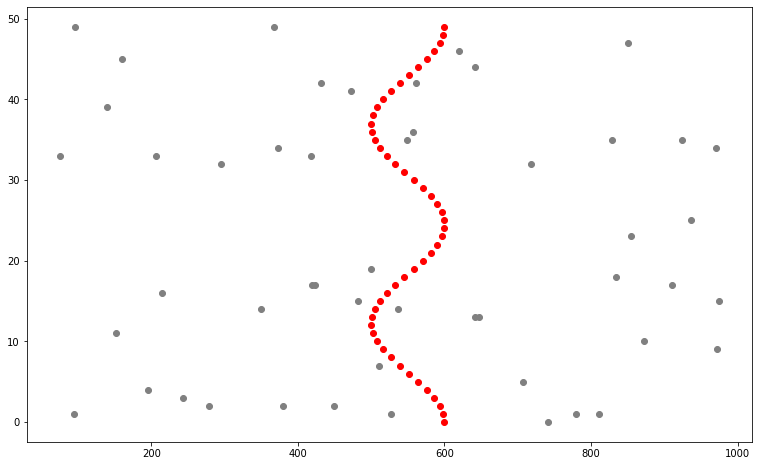

In [10]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [11]:
t_true = aer_pattern[1].min()
t_true

500.0

## Supervised STDP learning rule

In [12]:
address

array([33,  1, 49, 39, 11, 45,  4, 33, 16,  3,  2, 32, 14, 49, 34,  2, 33,
       17, 17, 42,  2, 41, 15, 19, 12, 37, 36, 13, 38, 11, 14, 35, 39, 10,
        7, 15, 34, 40,  9, 33, 16, 41,  8,  1, 17, 32, 14, 42,  7, 18, 31,
       35, 43,  6, 36, 19, 30, 42, 44,  5, 20, 29, 45,  4, 28, 21, 46,  3,
       22, 27, 47,  2, 23, 26,  1, 48, 24, 25, 49,  0, 46, 13, 44, 13,  5,
       32,  0,  1,  1, 35, 18, 47, 23, 10, 17, 35, 25, 34,  9, 15])

In [13]:
delays = np.random.randint(0, 100, nb_syn).astype(float)

In [14]:
delays[address]

array([13., 36., 41., 60., 78., 63., 49., 13., 26., 67., 60., 51., 64.,
       41., 20., 60., 13., 85., 85., 25., 60., 13., 54., 60., 67.,  2.,
       24., 92., 80., 78., 64.,  2., 60., 78., 99., 54., 20., 76., 66.,
       13., 26., 13., 59., 36., 85., 51., 64., 25., 99., 75.,  5.,  2.,
        2., 64., 24., 60., 14., 25., 96., 99., 53., 97., 63., 49., 59.,
       67., 92., 67., 97., 90., 93., 60., 41., 11., 36., 38., 34., 41.,
       41., 38., 92., 92., 96., 92., 99., 51., 38., 36., 36.,  2., 75.,
       93., 41., 78., 85.,  2., 41., 20., 66., 54.])

In [15]:
timestamp

array([ 75.        ,  95.        ,  96.        , 139.        ,
       152.        , 160.        , 195.        , 206.        ,
       215.        , 243.        , 278.        , 295.        ,
       350.        , 367.        , 373.        , 379.        ,
       418.        , 419.        , 423.        , 432.        ,
       449.        , 472.        , 482.        , 500.        ,
       500.        , 500.        , 500.82015434, 500.82015434,
       502.44699609, 502.44699609, 504.85381258, 504.85381258,
       508.00108394, 508.00108394, 511.        , 511.83713205,
       511.83713205, 516.29896911, 516.29896911, 521.31333189,
       521.31333189, 526.79788469, 526.79788469, 527.        ,
       532.66257129, 532.66257129, 537.        , 538.81109372,
       538.81109372, 545.14249339, 545.14249339, 549.        ,
       551.5528089 , 551.5528089 , 557.        , 557.93678306,
       557.93678306, 561.        , 564.18959117, 564.18959117,
       570.2085623 , 570.2085623 , 575.89486512, 575.89

In [16]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.04):
        self.delays = np.random.rand(nb_syn) * T
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, aer):

        addresses, timestamps = aer

        delayed_timestamps = timestamps + self.delays[addresses]

        #sorted_ind_times = np.argsort(delayed_timestamps)
        sorted_times = np.sort(delayed_timestamps)
        dts = np.diff(np.hstack((0, sorted_times)))
        V = np.zeros_like(dts)
        for i, dt in enumerate(dts):
            if i==0: 
                V[i] = 0
            else:
                if V[i-1]>1: 
                    V[i] = 0.
                else:
                    V[i] = np.exp( - dt / self.tau) * (V[i-1] + self.weight)
        
        #V = self.weight * np.arange(len(addresses)) #* np.exp(-sorted_times/self.tau)
        
        #return delayed_timestamps[sorted_ind_times], V
        return sorted_times, V

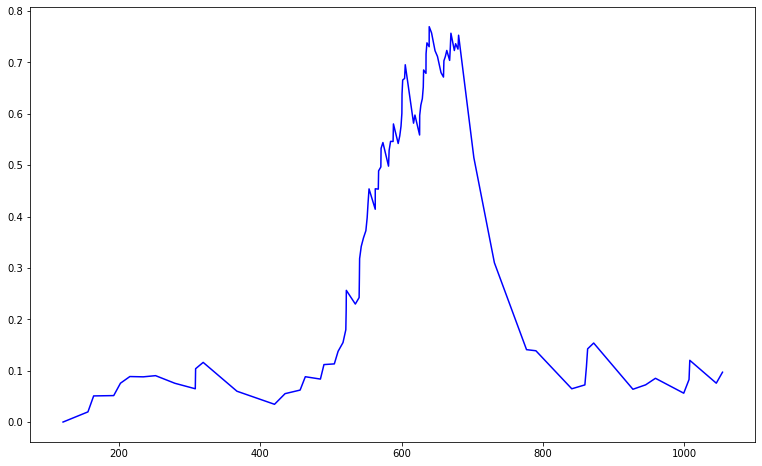

In [17]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [18]:
sorted_times, np.hstack((0, sorted_times)), np.gradient(np.hstack((0, sorted_times)))

(array([ 120.72009295,  155.9673981 ,  164.05433713,  192.45160104,
         201.99455218,  215.3094725 ,  234.27070576,  251.72009295,
         279.02915782,  307.93733547,  308.40189741,  319.09825546,
         366.93289599,  420.09825546,  435.05433713,  456.35450338,
         463.72009295,  485.09175999,  490.09825546,  504.78702615,
         510.12298274,  517.05814714,  521.05814714,  521.56704571,
         521.78670857,  534.53220195,  539.88964468,  540.26832126,
         540.58403766,  542.89859713,  546.0644687 ,  549.44636312,
         551.27711121,  552.55126577,  553.93289599,  562.7238092 ,
         562.74001874,  567.03342484,  567.48514094,  570.6485907 ,
         570.99563611,  573.5713458 ,  581.52888767,  582.38839782,
         584.41450868,  587.9673981 ,  588.46724163,  595.19163543,
         597.41532043,  599.20761103,  600.42469108,  600.64710692,
         601.5772912 ,  604.26163788,  605.21060596,  616.93407645,
         618.9198644 ,  625.51591229,  625.65904

In [19]:
sorted_times.shape, np.hstack((0, sorted_times)).shape, np.gradient(np.hstack((0, sorted_times)))[:-1].shape, np.diff(np.hstack((0, sorted_times))).shape

((100,), (101,), (100,), (100,))

In [20]:
sorted_times[-1], sorted_times[-2], sorted_times[-1] - sorted_times[-2]

(1054.3545033828027, 1045.5512657731435, 8.803237609659163)

In [21]:
V

array([0.        , 0.01976541, 0.05084024, 0.05147813, 0.07558372,
       0.08856146, 0.08798641, 0.09028184, 0.07545367, 0.06476114,
       0.10379229, 0.11609893, 0.05996716, 0.03451985, 0.05525418,
       0.06221185, 0.08821137, 0.083617  , 0.11183876, 0.11318728,
       0.13768136, 0.15466919, 0.17970231, 0.21747753, 0.25634884,
       0.22966631, 0.24226604, 0.28013636, 0.31812128, 0.34192127,
       0.35848867, 0.37242705, 0.39759917, 0.42658868, 0.45387212,
       0.41424532, 0.45409808, 0.45344134, 0.48900351, 0.4965708 ,
       0.53285941, 0.54409623, 0.49815681, 0.52898485, 0.54638923,
       0.54616766, 0.58033701, 0.54227595, 0.55694739, 0.5759283 ,
       0.60111662, 0.63827106, 0.66576937, 0.66887793, 0.69555075,
       0.58181361, 0.59760179, 0.55880075, 0.5970891 , 0.61686633,
       0.62964163, 0.65203355, 0.6853722 , 0.67880748, 0.71685686,
       0.73818145, 0.73066163, 0.76964931, 0.75747974, 0.72288275,
       0.71163945, 0.6802343 , 0.67155322, 0.70315612, 0.71202

In [22]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [23]:
np.argmax(V>1)

0

In [24]:
t_out = sorted_times[np.argmax(V>1)]
t_out

120.72009294632036

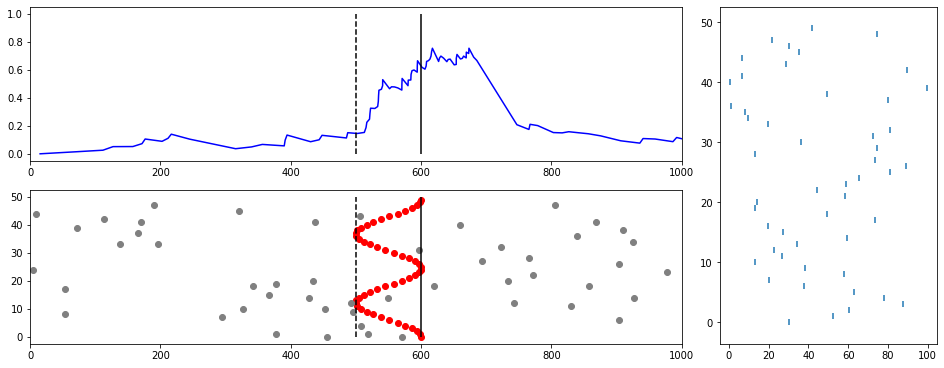

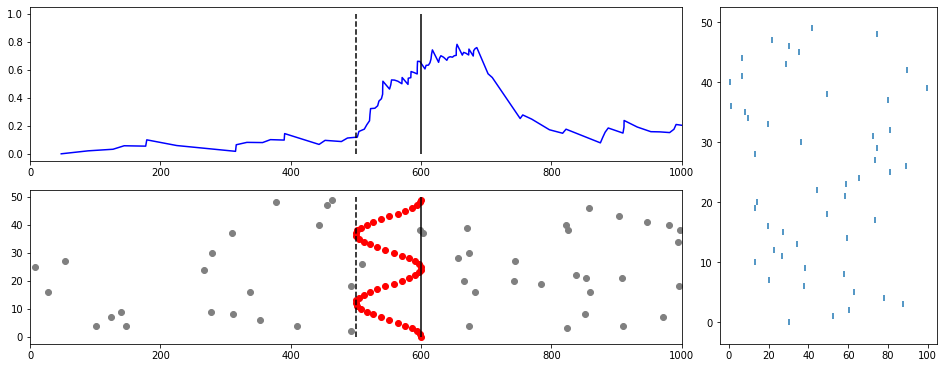

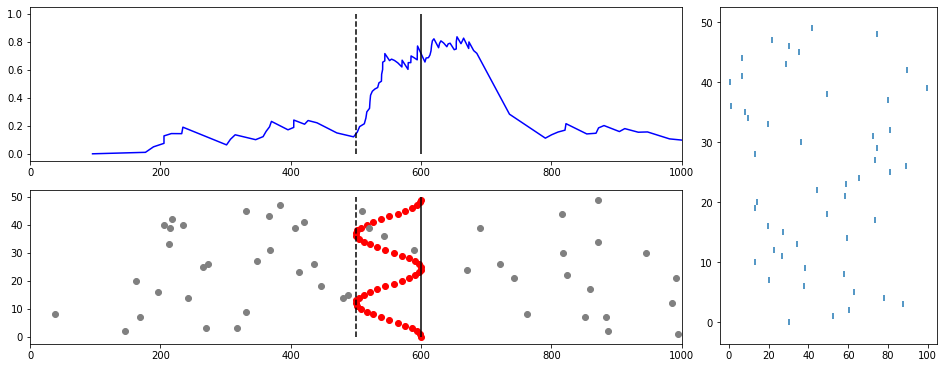

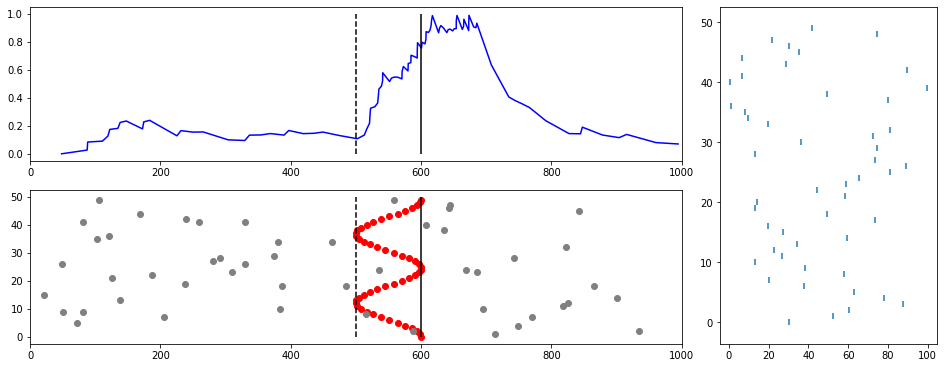

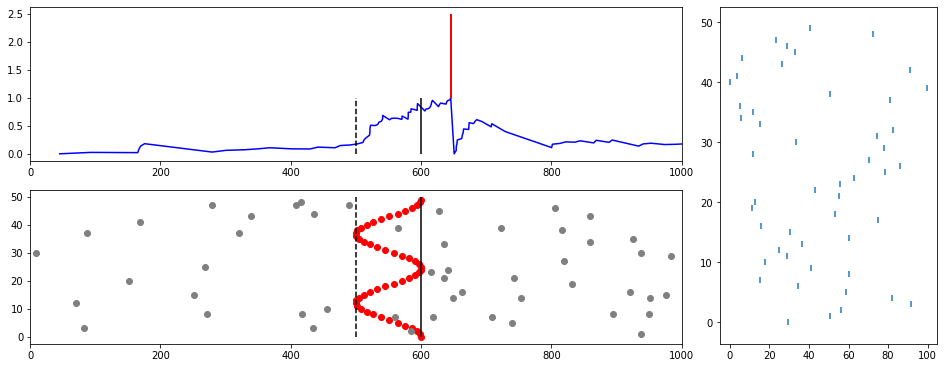

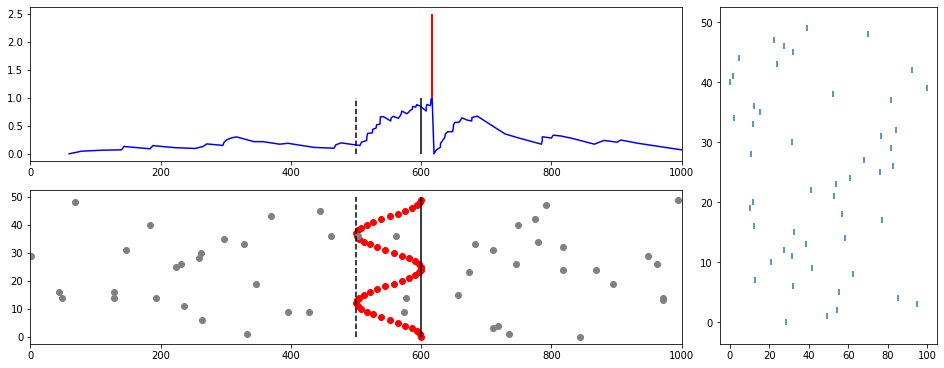

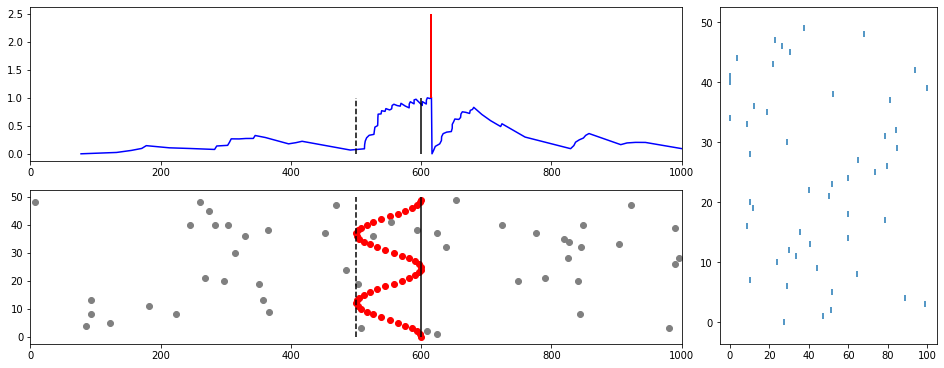

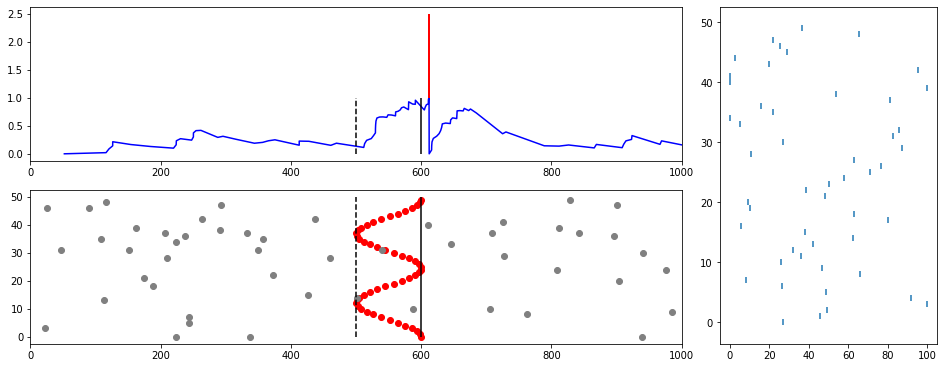

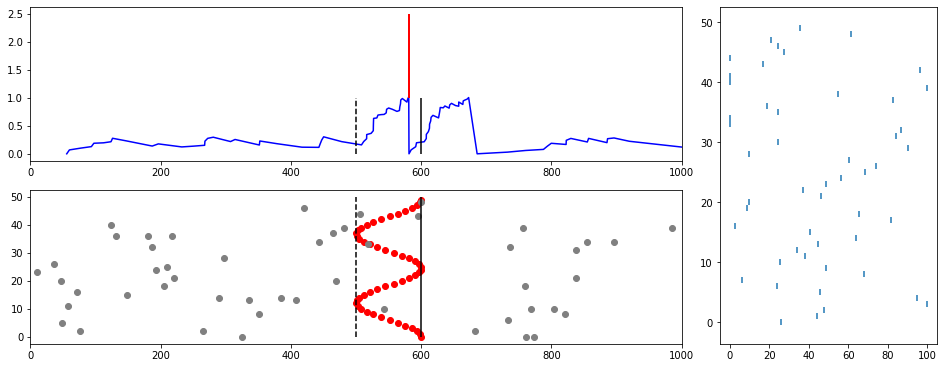

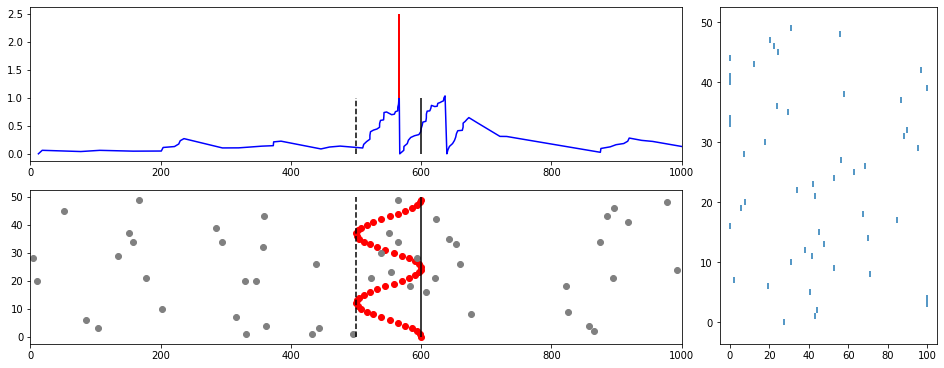

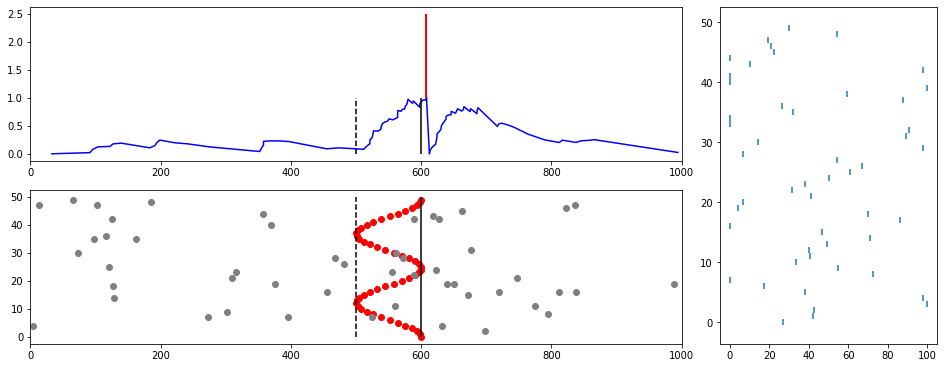

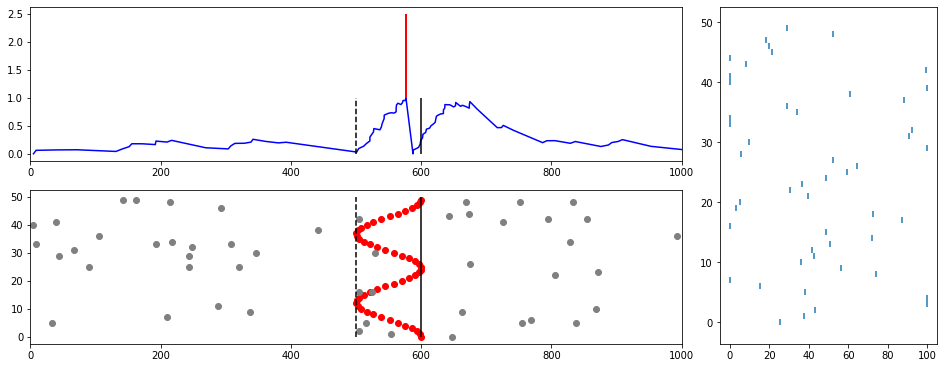

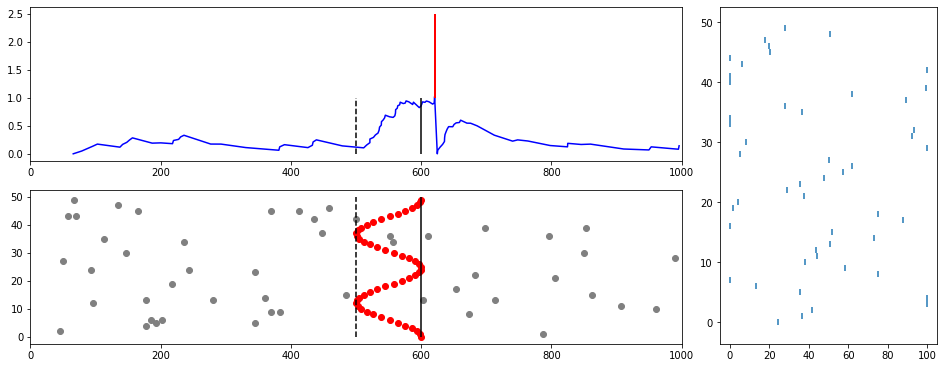

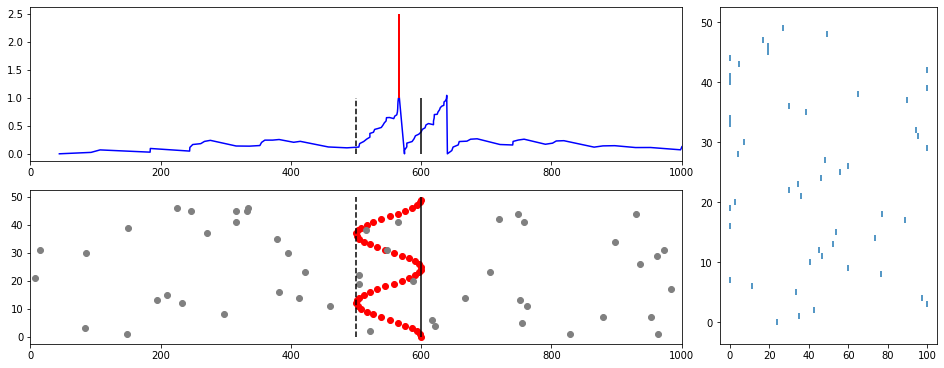

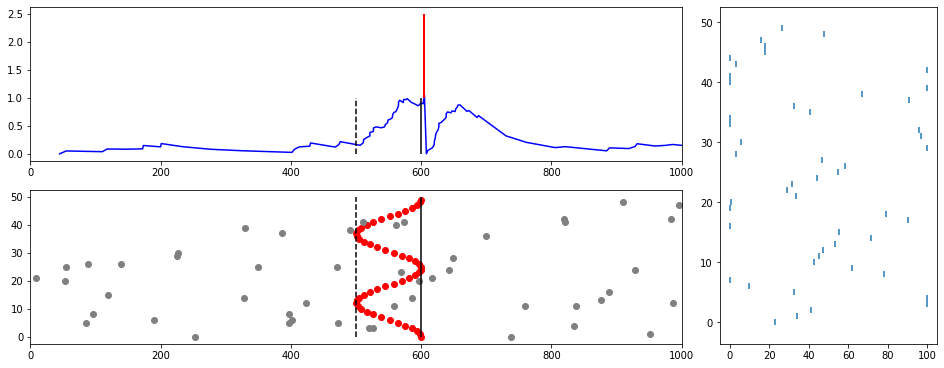

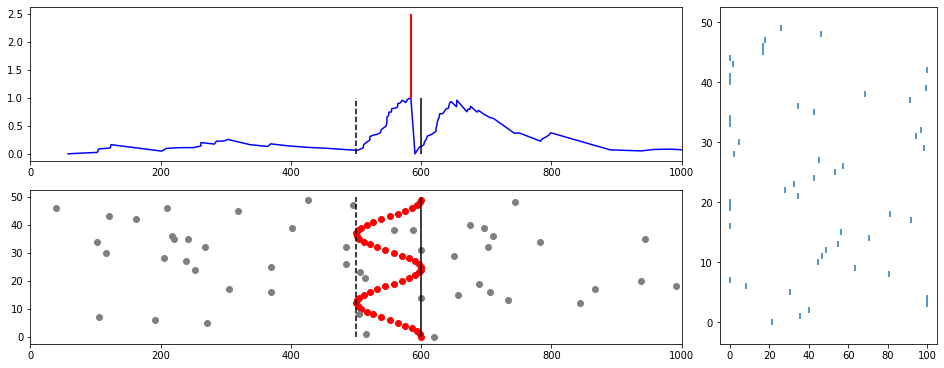

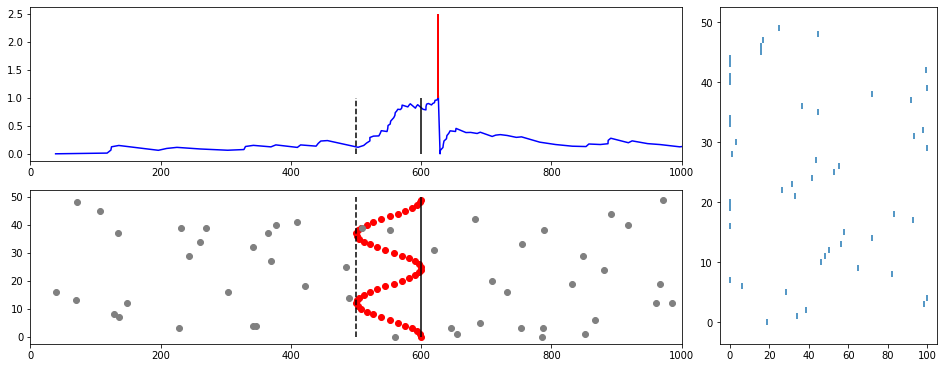

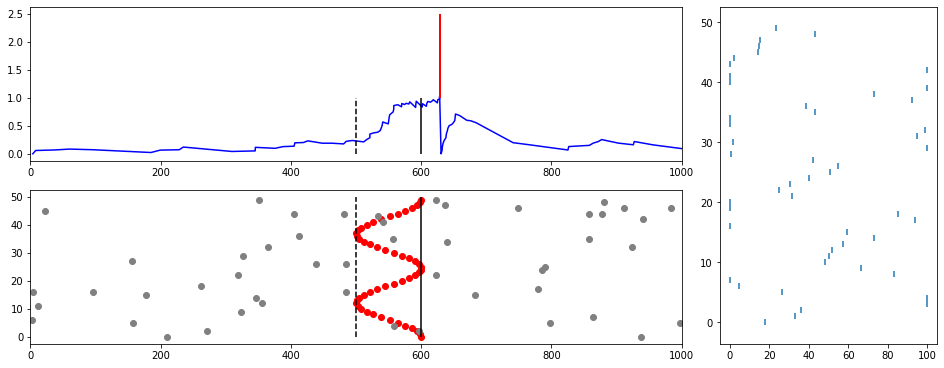

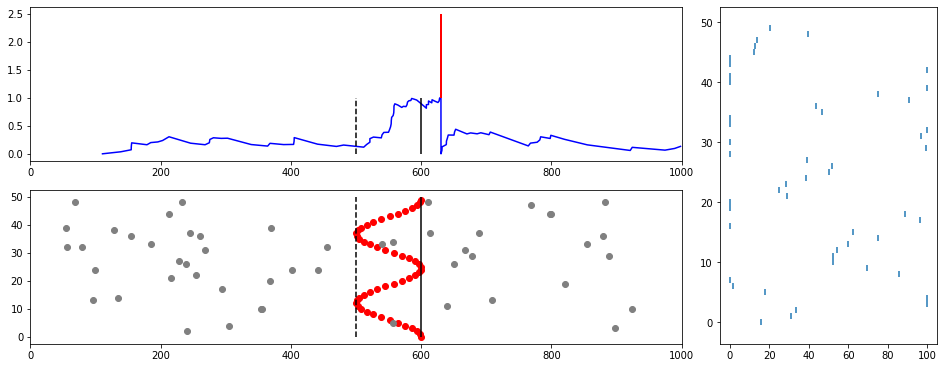

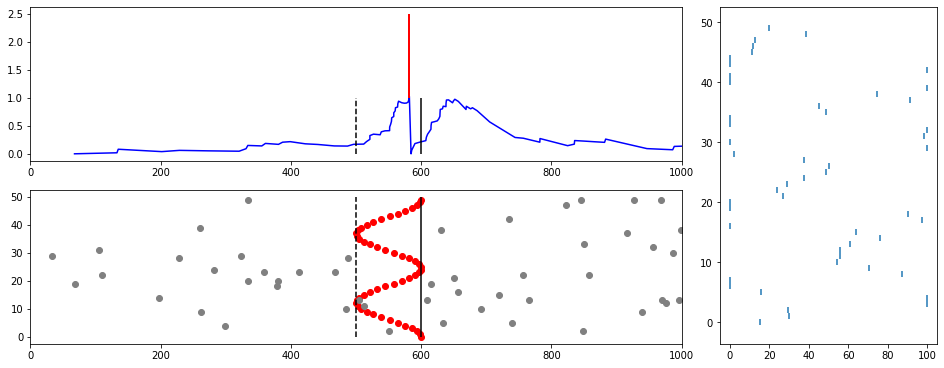

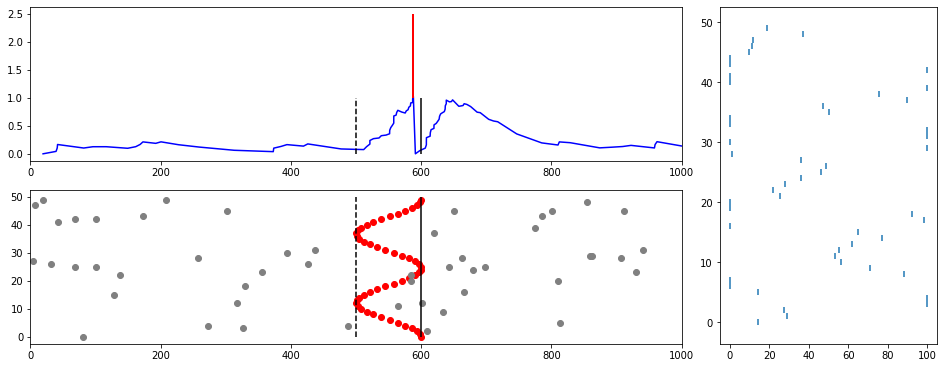

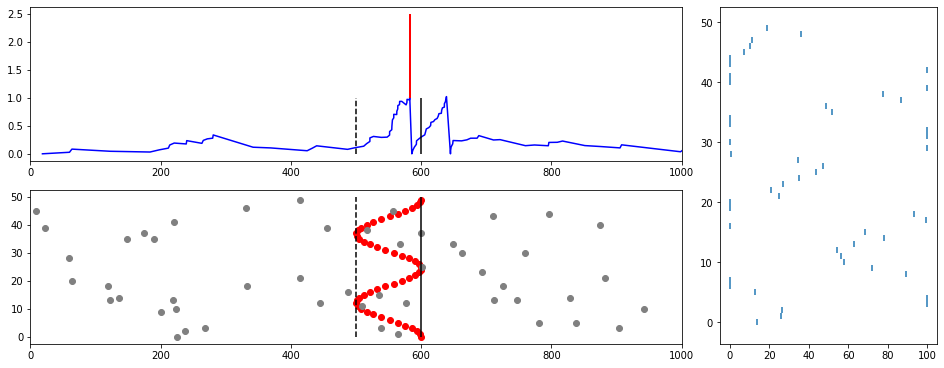

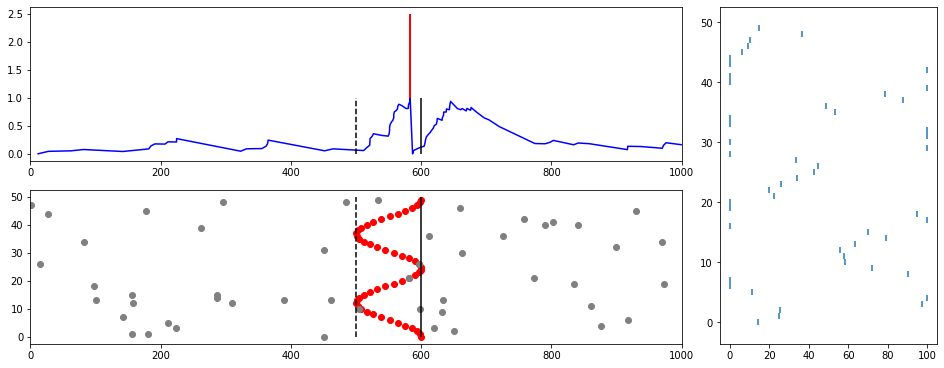

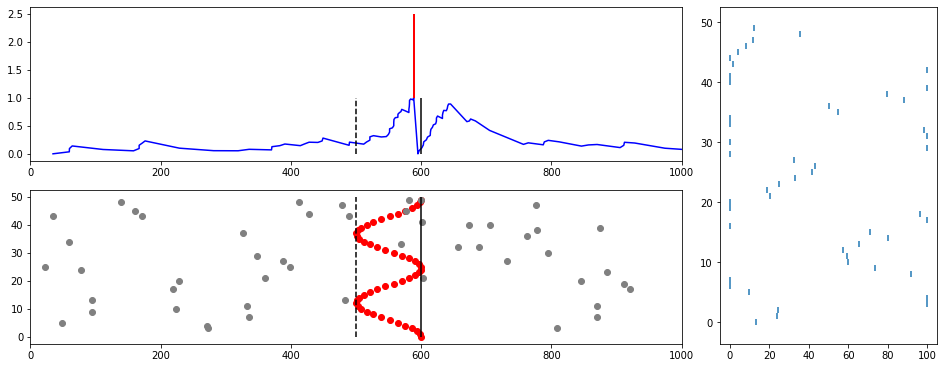

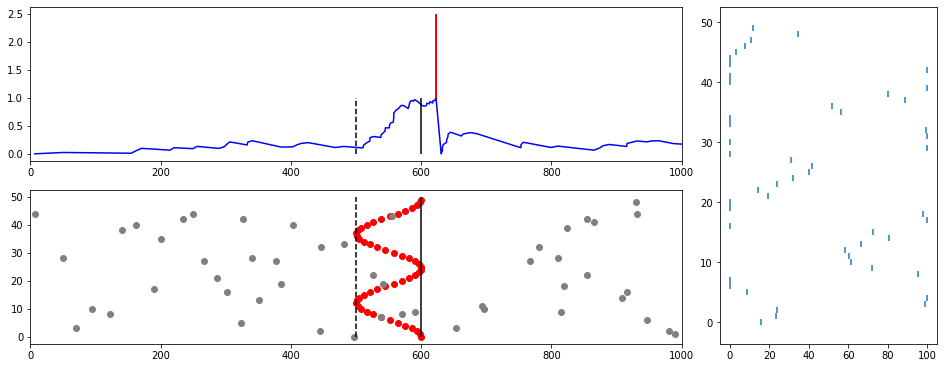

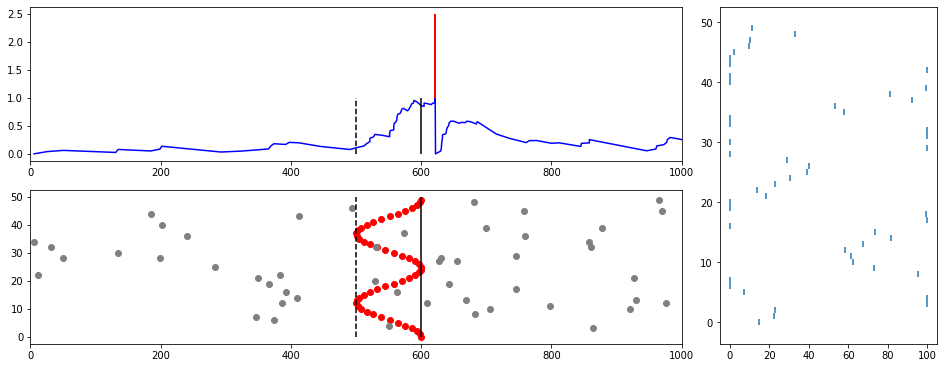

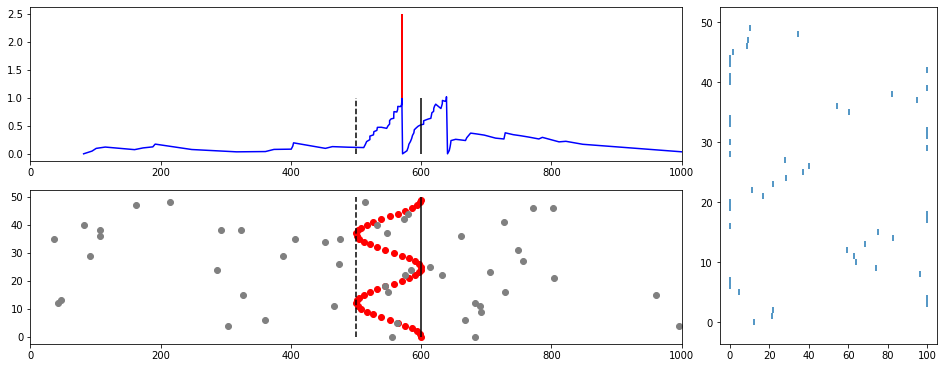

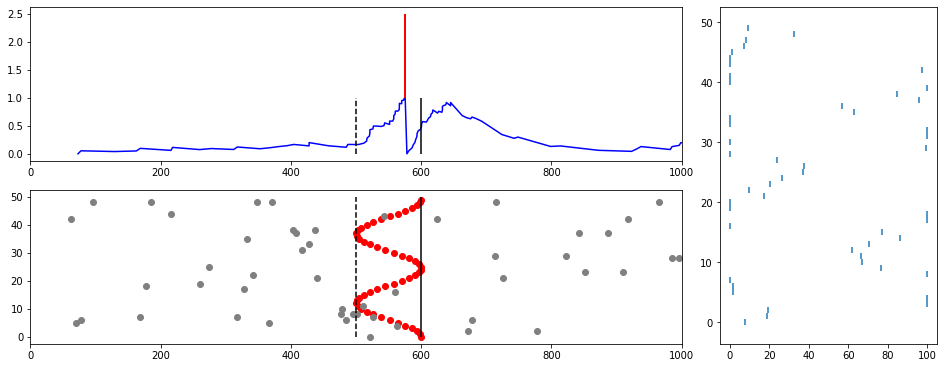

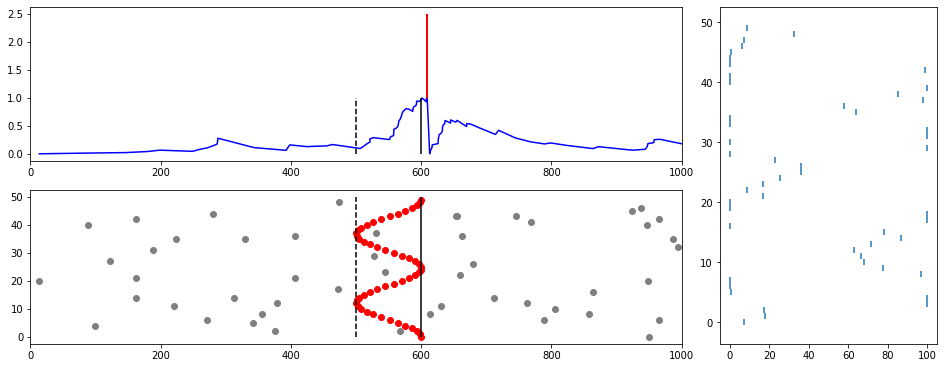

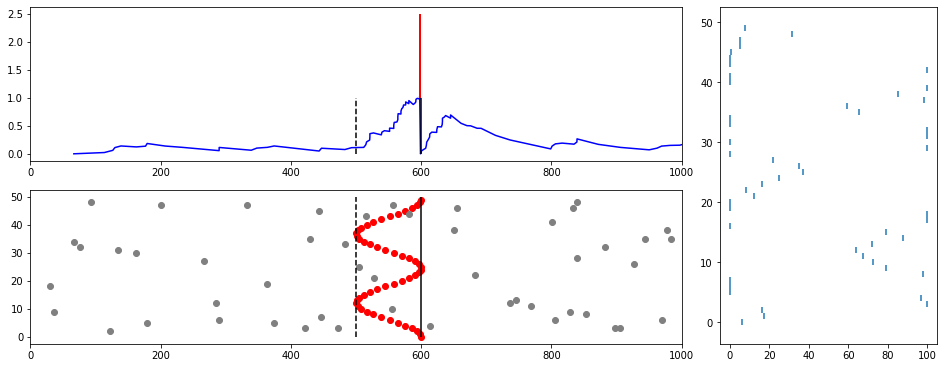

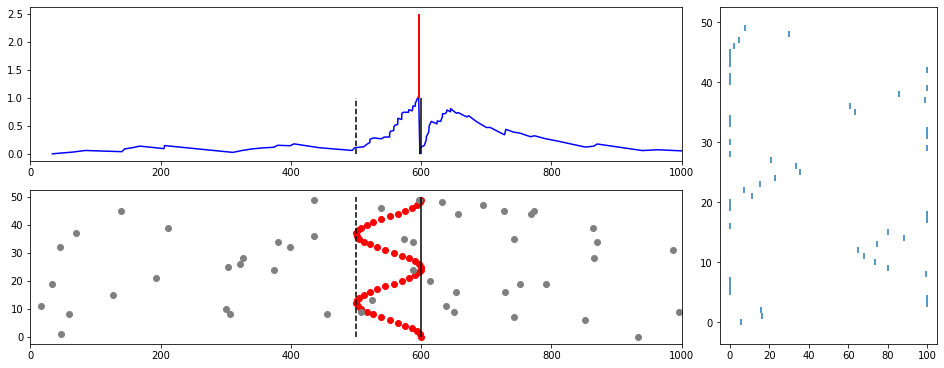

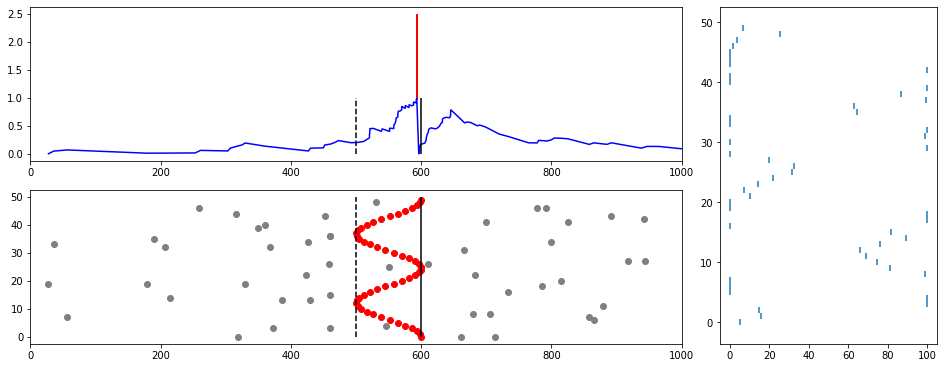

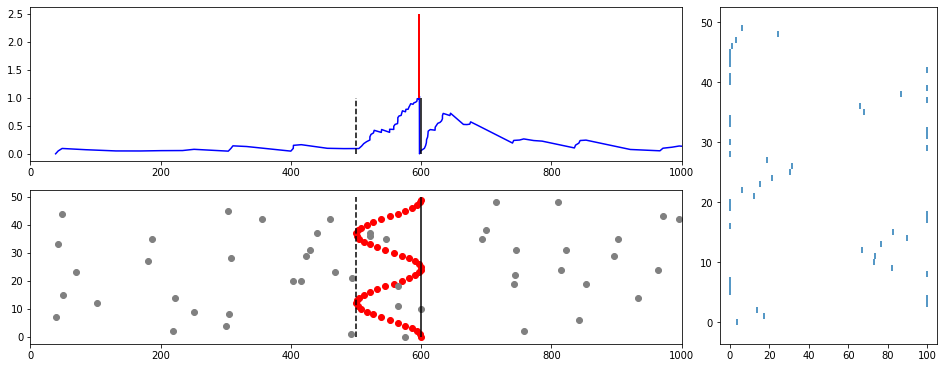

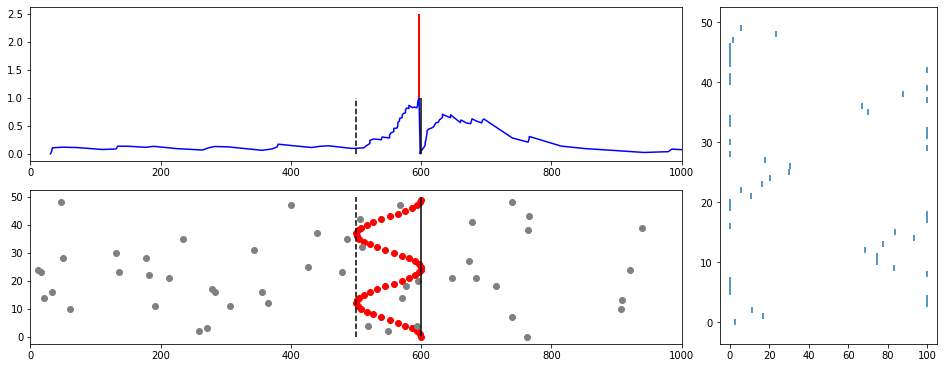

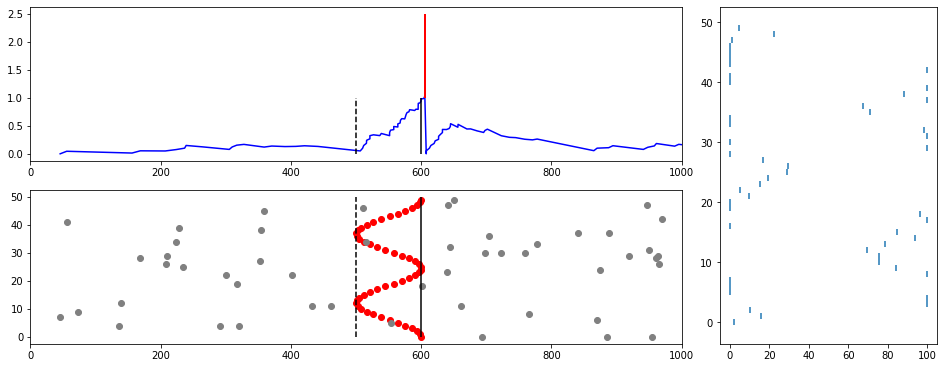

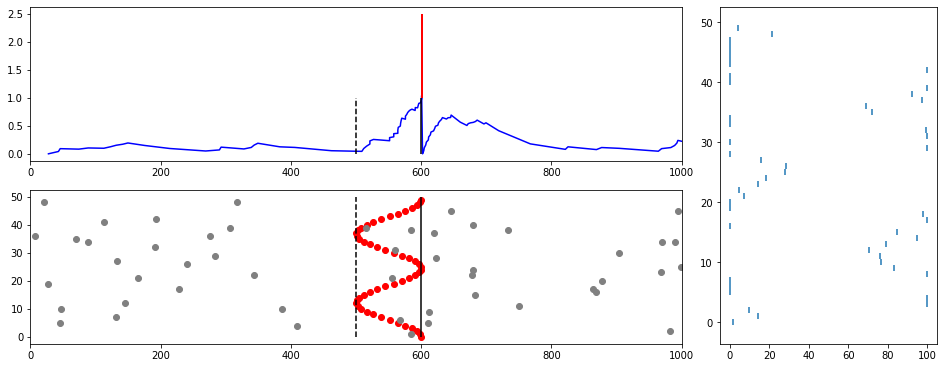

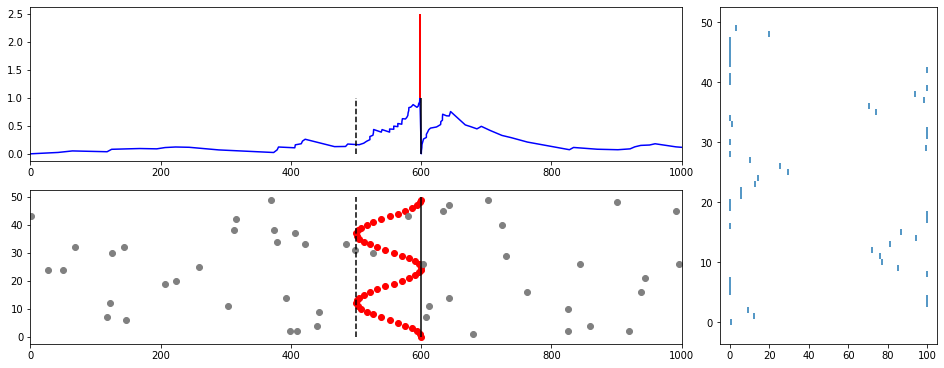

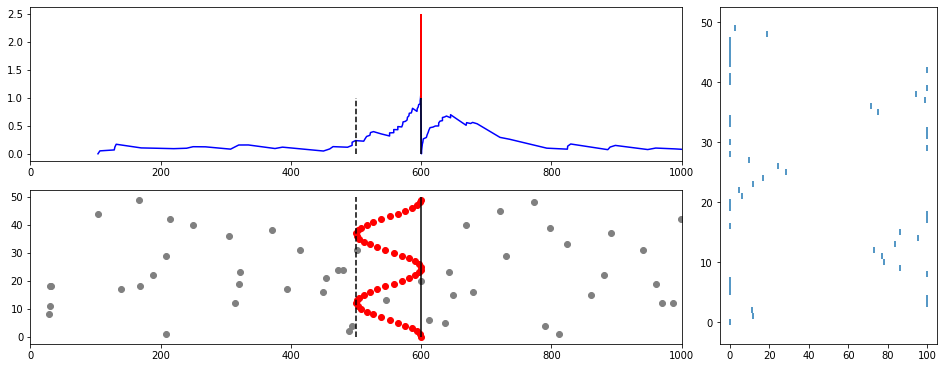

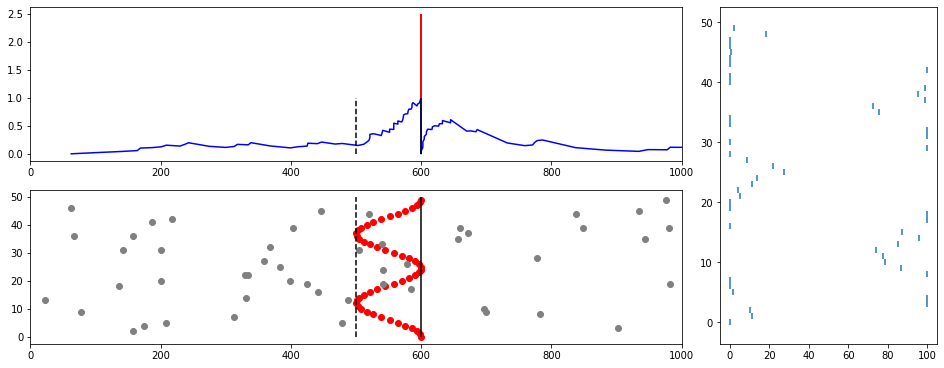

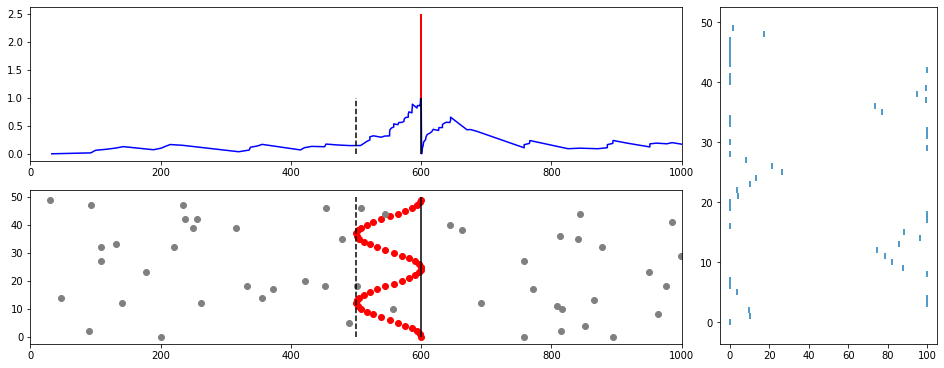

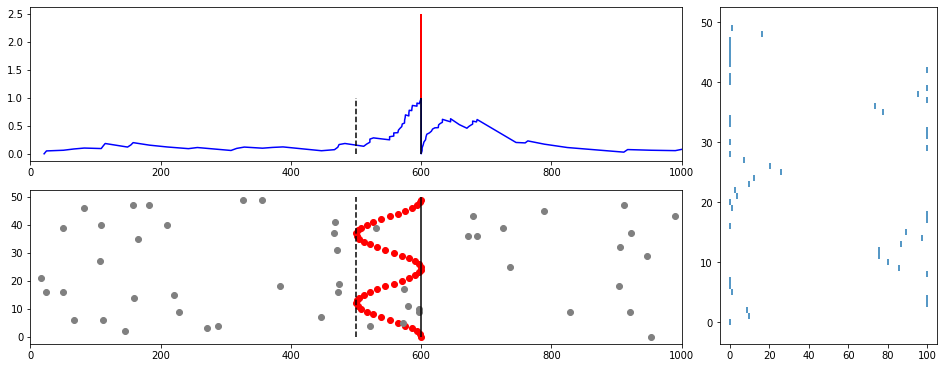

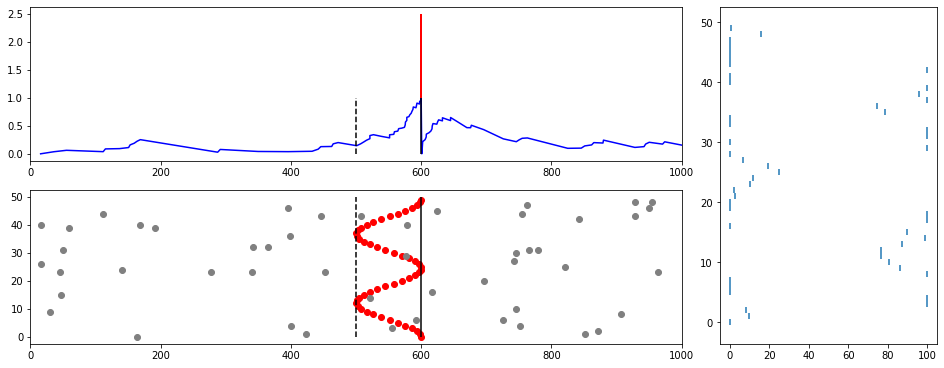

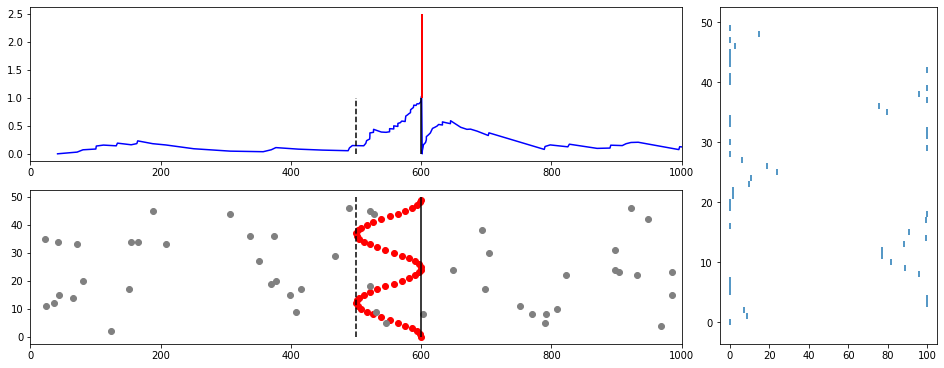

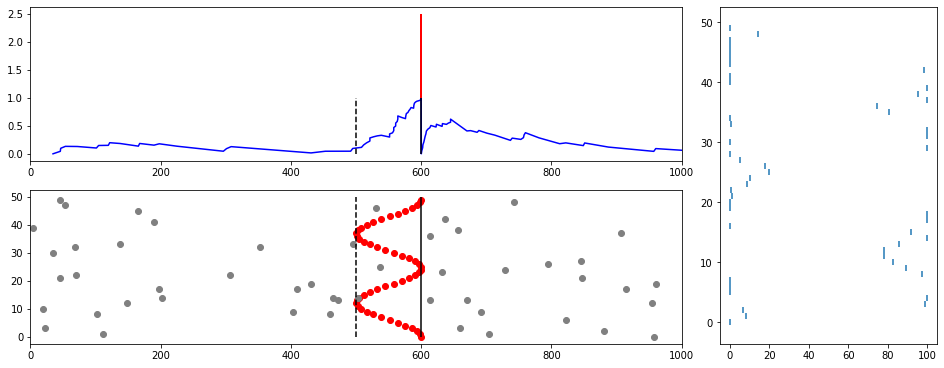

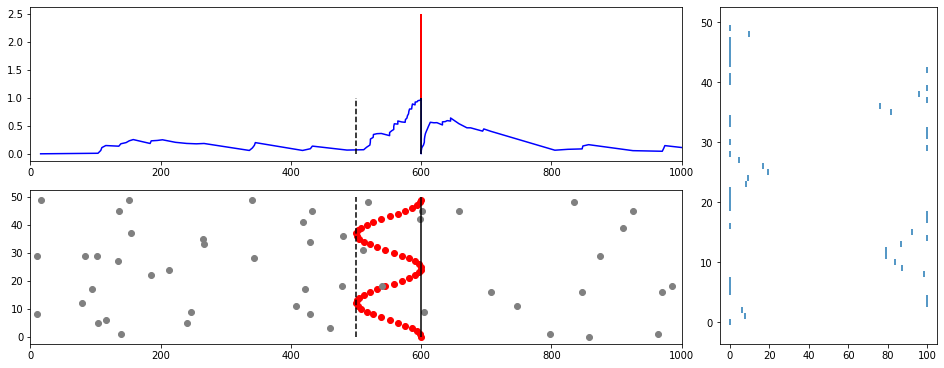

In [25]:
N = SD_neuron(nb_syn)

Dweight0 = 1e-1
Ddelay0 = 4.
N_epochs = 50

for i_epoch in range(N_epochs):
    t_true = 500 #int(np.random.rand()*(simtime-T))
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)] # output spike
        time_error = (t_true+T) - t_out # negative = too early, positive = too late
        Dweight = Dweight0 * np.tanh( - time_error / N.tau )

        # STDP rule on the delays, event by event
        addresses, timestamps = aer
        for i_address, (address, timestamp) in enumerate(zip(addresses, timestamps)):
            # predicted time by neuron:
            pred_time = t_true + N.delays[address] # T - 
            # timestamp is that of the i_address-th event - it is fired on synapse address
            delay_pred_error = pred_time - timestamp
            # STDP rule
            Ddelay = Ddelay0 * np.sign(delay_pred_error) * np.exp( - np.abs(delay_pred_error) / N.tau )
            delay = N.delays[address]
            delay += Ddelay
            delay= np.min((delay, T))
            delay = np.max((delay, 0))
            N.delays[address] = delay

    N.weight *= 1 + Dweight
    #print(N.weight)
    
    if i_epoch % 10:
        fig = plt.figure(constrained_layout=True, figsize = (13, 5))
        axs = fig.subplot_mosaic(
        """
        AAAC
        BBBC
        """
        )
        
        axs['A'].plot(sorted_times, V, color='blue')
        axs['A'].vlines([t_true], 0, 1, linestyles='--', color='black')
        axs['A'].vlines([t_true+T], 0, 1, color='black')
        if V.max() > 1: axs['A'].vlines([t_out], 1, 2.5, color='red', lw=2) # spike
        axs['A'].set_xlim(0, simtime)
        adress_noise, time_noise = aer_noise
        adress_pattern, time_pattern = aer_pattern
        axs['B'].vlines([t_true], 0, nb_syn, linestyles='--', color='black')
        axs['B'].vlines([t_true+T], 0, nb_syn, color='black')
        axs['B'].scatter(time_pattern, adress_pattern, color='red');
        axs['B'].scatter(time_noise, adress_noise, color='grey')
        axs['B'].set_xlim(0, simtime)

        axs['C'].eventplot(N.delays[:,np.newaxis]);
        plt.show()